# Лекция 3

## Проект

Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

user_data:

client – идентификатор пользователя

premium – является ли клиент премиум

age – возраст

logs:

client – идентификатор пользователя

success – результат (успех - 1, нет - 0)

platform – платформа

time – время в формате Unix

In [9]:
import pandas as pd
user_data = pd.read_csv('user_data.csv')
logs = pd.read_csv('logs.csv')

In [10]:
user_data.shape

(2954, 3)

In [11]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [14]:
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [16]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [9]:
logs.shape

(4500, 4)

In [12]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [15]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [17]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


Какой клиент совершил больше всего успешных операций? (success == True)

In [31]:
success_number = logs.query('success == True') \
                     .groupby('client', as_index=False) \
                     .agg({'platform' : 'count'}) \
                     .rename(columns={'platform' : 'success_number'}) \
                     .sort_values('success_number', ascending=False)
    

In [32]:
maximum_success = success_number.success_number.max()

In [41]:
successful_clients = success_number.query('success_number == @maximum_success') \
              .sort_values('client') \
              .client \
              .tolist()

successful_clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

С какой платформы осуществляется наибольшее количество успешных операций?

In [45]:
logs.query('success == True') \
    .groupby('platform') \
    .agg({'client' : 'count'}) \
    .idxmax() 

client    phone
dtype: object

Какую платформу предпочитают премиумные клиенты?

In [50]:
data = logs.merge(user_data, on='client') \
           .query('premium == True') \
           .platform \
           .value_counts() \
           .idxmax()

'phone'

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

In [7]:
import seaborn as sns

C:\Users\galin\AppData\Local\Temp\ipykernel_6260\2546916093.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.query('premium == False').age)
C:\Users\galin\AppData\Local\Temp\ipykernel_6260\2546916093.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.query('premium == True').age)


<Axes: xlabel='age', ylabel='Density'>

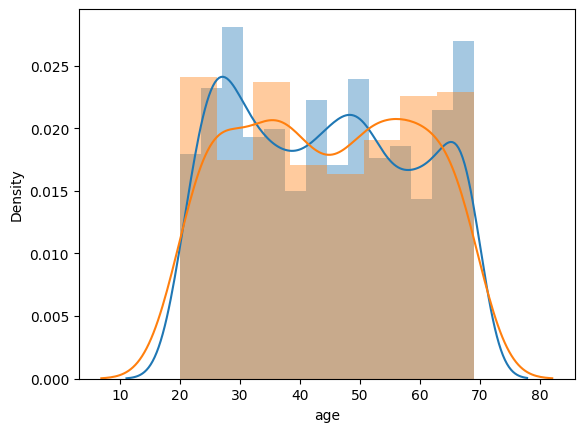

In [15]:
data = logs.merge(user_data)
sns.distplot(data.query('premium == False').age)
sns.distplot(data.query('premium == True').age)

In [6]:
import matplotlib.pyplot as plt

C:\Users\galin\AppData\Local\Temp\ipykernel_6260\3986421496.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.query('premium == False').age, ax = ax[0], color='green')
C:\Users\galin\AppData\Local\Temp\ipykernel_6260\3986421496.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.quer

<Axes: xlabel='age', ylabel='Density'>

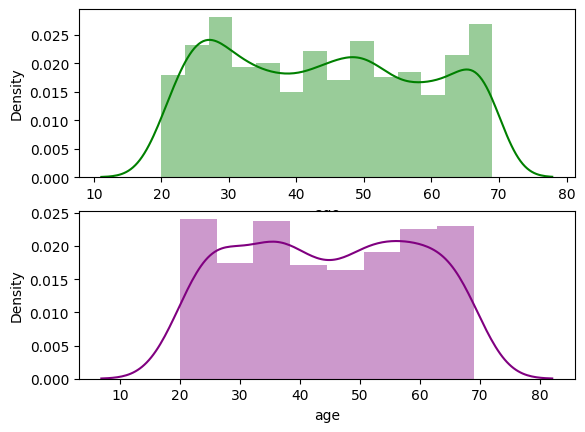

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=1)

sns.distplot(data.query('premium == False').age, ax = ax[0], color='green')
sns.distplot(data.query('premium == True').age, ax =ax[1], color='purple')

Постройте график распределения числа успешных операций

In [17]:
client_vs_success_number = data.groupby('client') \
                               .agg({'success' : 'sum'})

C:\Users\galin\AppData\Local\Temp\ipykernel_6260\1202995899.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(client_vs_success_number)


<Axes: ylabel='Density'>

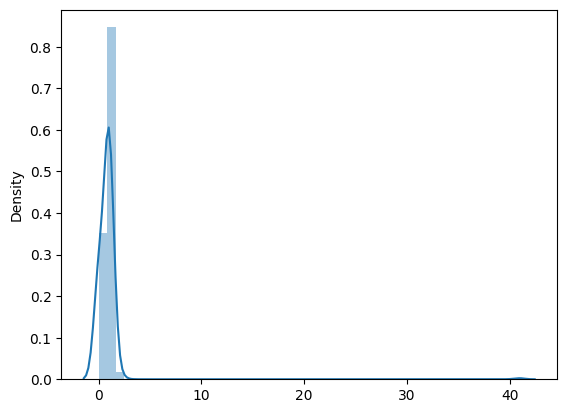

In [19]:
sns.distplot(client_vs_success_number)

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

In [96]:
age_vs_success_number = data.query('platform == "computer"') \
    .groupby('age', as_index=False) \
    .agg({'success' : 'sum'})

age_vs_success_number.head()

,age,success
0,20,11
1,21,15
2,22,8
3,23,15
4,24,26


<Axes: xlabel='age', ylabel='success'>

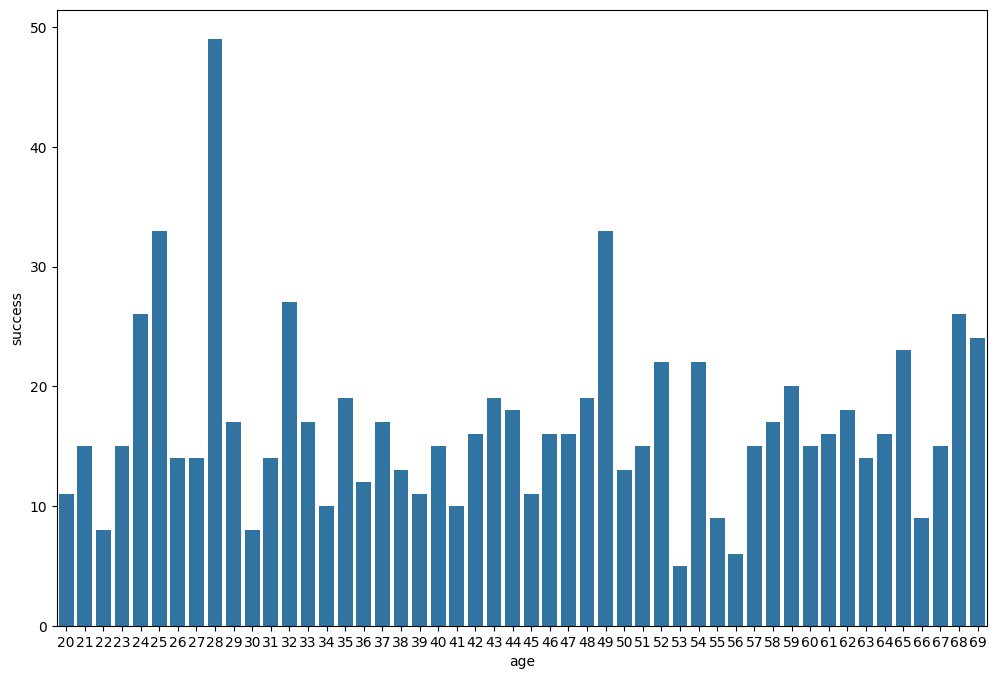

In [99]:
plt.figure(figsize=(12,8))
sns.barplot(x = age_vs_success_number.age, y = age_vs_success_number.success)

In [110]:
computer_success = data.query('platform == "computer" and success == True') 